In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Guttha Keerthana
212223240045


In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 21.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 607kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.75MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.53MB/s]


In [ ]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

Guttha Keerthana
21223240045


In [ ]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [ ]:
class ConvolutionalNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)


In [ ]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Guttha Keerthana
212223240045

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
import time
start_time = time.time()

# Variables ( Trackers)
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# for loop epochs
for i in range(epochs):

    trn_corr = 0
    tst_corr = 0


    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1

        # Apply the model
        y_pred = model(X_train)  # we not flatten X-train here
        loss = criterion(y_pred, y_train)


        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()  # Trure 1 / False 0 sum()
        trn_corr += batch_corr

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%1200 == 0:
            print(f'epoch: {i}  batch: {b} loss: {loss.item()}')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training took {total/60} minutes')

epoch: 0  batch: 1200 loss: 1.087372064590454
epoch: 0  batch: 2400 loss: 0.10707752406597137
epoch: 0  batch: 3600 loss: 0.03542609140276909
epoch: 0  batch: 4800 loss: 0.27085059881210327
epoch: 0  batch: 6000 loss: 0.7142031192779541
epoch: 1  batch: 1200 loss: 0.6858618855476379
epoch: 1  batch: 2400 loss: 0.1517302691936493
epoch: 1  batch: 3600 loss: 0.010819053277373314
epoch: 1  batch: 4800 loss: 0.03455958142876625
epoch: 1  batch: 6000 loss: 0.15956053137779236
epoch: 2  batch: 1200 loss: 0.17828154563903809
epoch: 2  batch: 2400 loss: 0.008124666288495064
epoch: 2  batch: 3600 loss: 0.06224703788757324
epoch: 2  batch: 4800 loss: 0.027916785329580307
epoch: 2  batch: 6000 loss: 0.005676943808794022
epoch: 3  batch: 1200 loss: 0.009970610029995441
epoch: 3  batch: 2400 loss: 0.006455126218497753
epoch: 3  batch: 3600 loss: 0.1447383463382721
epoch: 3  batch: 4800 loss: 0.12300224602222443
epoch: 3  batch: 6000 loss: 0.02338074892759323
epoch: 4  batch: 1200 loss: 0.5081742405

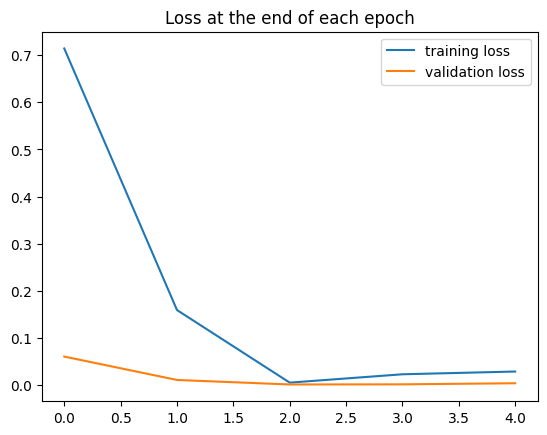

In [ ]:
train_losses = [t.detach().numpy() for t in train_losses]
test_losses = [t.detach().numpy() for t in test_losses]

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();
plt.show()

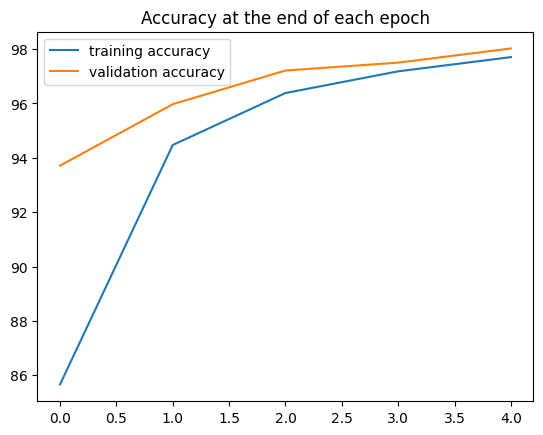

In [ ]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();
plt.show()

In [ ]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [ ]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [ ]:
correct.item()

9802

In [ ]:
correct.item()/len(test_data)

0.9802

In [ ]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 970    0    2    0    0    2    5    0    5    1]
 [   0 1133    9    0    0    0    2    7    0    6]
 [   0    0  997    1    0    0    1    5    1    0]
 [   1    0    4  987    0   12    0    2    3    2]
 [   0    0    2    0  975    0    6    2    2    8]
 [   0    0    0    6    0  858    4    0    0    0]
 [   4    1    0    0    0    6  939    0    3    0]
 [   1    0   10    3    1    1    0 1004    5    4]
 [   3    1    7    4    0    6    1    1  951    0]
 [   1    0    1    9    6    7    0    7    4  988]]


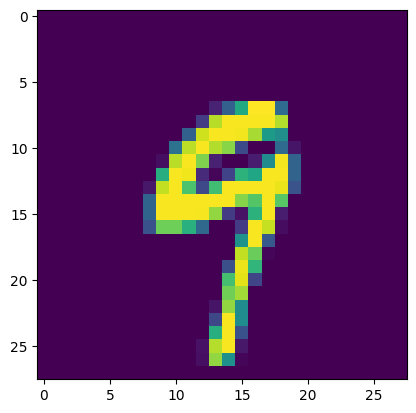

In [ ]:
plt.imshow(test_data[2019][0].reshape(28,28))
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[2019][0].view(1,1,28,28))

In [ ]:
new_prediction.argmax()

tensor(9)

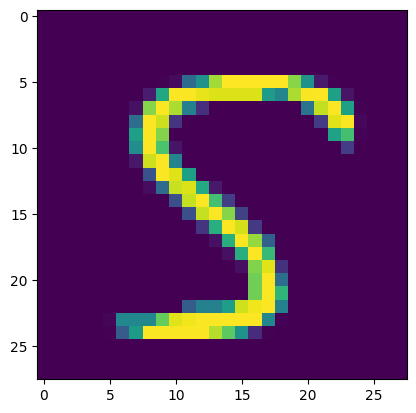

In [ ]:
plt.imshow(test_data[333][0].reshape(28,28))
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[333][0].view(1,1,28,28))

In [ ]:
new_prediction.argmax()

tensor(5)

In [ ]:
test_data[333][1]

5

In [ ]:
torch.save(model.state_dict(),'GutthaKeerthana.pt')